#  Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
# 1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [1]:
# import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

# 
There is 8425 rows and 23 columns present in the dataset

In [4]:
df.duplicated().sum()

1663

# there are duplicate value present in the dataset we need to drop this values

In [5]:
df = df.drop_duplicates()
df.shape

(6762, 23)

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

# There are missing value present in the dataset but we drop some columns on more than 1000 missing values and also we drop target variable null values

In [7]:
missing_threshold = 1000
cols_with_many_missing = df.columns[df.isnull().sum() > missing_threshold]
cols_with_many_missing

Index(['Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm'],
      dtype='object')

# 
we can see the null values is more than 1000 in the dataset

In [8]:
df.drop(columns=cols_with_many_missing,axis=1,inplace=True)
df.dropna(subset=['Rainfall','RainTomorrow'],inplace=True)

In [9]:
df.isnull().sum()

Date               0
Location           0
MinTemp           47
MaxTemp           34
Rainfall           0
WindGustDir      902
WindGustSpeed    902
WindDir9am       767
WindDir3pm       273
WindSpeed9am      41
WindSpeed3pm      80
Humidity9am       35
Humidity3pm       77
Temp9am           32
Temp3pm           73
RainToday          0
RainTomorrow       0
dtype: int64

# 
Now we have to fill null values imputing techniques 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 0 to 8423
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6558 non-null   object 
 1   Location       6558 non-null   object 
 2   MinTemp        6511 non-null   float64
 3   MaxTemp        6524 non-null   float64
 4   Rainfall       6558 non-null   float64
 5   WindGustDir    5656 non-null   object 
 6   WindGustSpeed  5656 non-null   float64
 7   WindDir9am     5791 non-null   object 
 8   WindDir3pm     6285 non-null   object 
 9   WindSpeed9am   6517 non-null   float64
 10  WindSpeed3pm   6478 non-null   float64
 11  Humidity9am    6523 non-null   float64
 12  Humidity3pm    6481 non-null   float64
 13  Temp9am        6526 non-null   float64
 14  Temp3pm        6485 non-null   float64
 15  RainToday      6558 non-null   object 
 16  RainTomorrow   6558 non-null   object 
dtypes: float64(10), object(7)
memory usage: 922.2+ KB


#  As we can see date dtype object but we have to change datetime

In [11]:
df['Date'] = pd.to_datetime(df['Date'],yearfirst=True)
df['Date']

0      2008-12-01
1      2008-12-02
2      2008-12-03
3      2008-12-04
4      2008-12-05
          ...    
8419   2017-06-20
8420   2017-06-21
8421   2017-06-22
8422   2017-06-23
8423   2017-06-24
Name: Date, Length: 6558, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 0 to 8423
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6558 non-null   datetime64[ns]
 1   Location       6558 non-null   object        
 2   MinTemp        6511 non-null   float64       
 3   MaxTemp        6524 non-null   float64       
 4   Rainfall       6558 non-null   float64       
 5   WindGustDir    5656 non-null   object        
 6   WindGustSpeed  5656 non-null   float64       
 7   WindDir9am     5791 non-null   object        
 8   WindDir3pm     6285 non-null   object        
 9   WindSpeed9am   6517 non-null   float64       
 10  WindSpeed3pm   6478 non-null   float64       
 11  Humidity9am    6523 non-null   float64       
 12  Humidity3pm    6481 non-null   float64       
 13  Temp9am        6526 non-null   float64       
 14  Temp3pm        6485 non-null   float64       
 15  RainToday      6558 n

In [13]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

In [14]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer() 
for i in numerical_col:
    column_data = df[i].values.reshape(-1, 1)
    df[i]=imputer.fit_transform(column_data)
    
    
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='most_frequent') 
for i in catgorical_col:
    column_data = df[i].values.reshape(-1, 1)
    df[i]=imputer.fit_transform(column_data)
    

In [15]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# 
we solved the null values in the dataset

In [16]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,6.558000e+03,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.00000,6558.000000
mean,1.342102e+18,13.069329,24.094651,2.771134,38.818246,12.699402,17.483637,67.458991,50.430952,17.89004,22.709422
std,7.218938e+16,5.567776,6.128218,10.599379,13.350938,9.782491,9.553073,17.224999,18.535110,5.72963,5.968296
min,1.228090e+18,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,1.90000,7.300000
25%,1.281053e+18,9.000000,19.600000,0.000000,30.000000,6.000000,9.000000,56.000000,38.000000,13.82500,18.400000
50%,1.331597e+18,13.069329,23.500000,0.000000,38.818246,11.000000,17.000000,68.000000,50.000000,17.90000,22.200000
75%,1.404086e+18,17.400000,28.400000,0.800000,46.000000,19.000000,24.000000,80.000000,62.000000,22.20000,26.800000
max,1.498349e+18,28.500000,45.500000,371.000000,107.000000,61.000000,83.000000,100.000000,99.000000,39.40000,44.100000


# 
It seems like you have provided a summary of a dataset with ten features (columns) and some basic statistics for each feature. The dataset contains 6558 rows of data.

Here's a breakdown of the features and their corresponding statistics:

MinTemp: Minimum temperature.

Count: 6558
Mean: 13.069329
Standard Deviation (Std): 5.567776
Minimum: -2.000000
25th Percentile (Q1): 9.000000
Median (50th Percentile or Q2): 13.069329
75th Percentile (Q3): 17.400000
Maximum: 28.500000

MaxTemp: Maximum temperature.

Count: 6558
Mean: 24.094651
Std: 6.128218
Minimum: 8.200000
Q1: 19.600000
Q2: 23.500000
Q3: 28.400000
Maximum: 45.500000

Rainfall: Amount of rainfall.

Count: 6558
Mean: 2.771134
Std: 10.599379
Minimum: 0.000000
Q1: 0.000000
Q2: 0.000000
Q3: 0.800000
Maximum: 371.000000

WindGustSpeed: Wind gust speed.

Count: 6558
Mean: 38.818246
Std: 13.350938
Minimum: 7.000000
Q1: 30.000000
Q2: 38.818246
Q3: 46.000000
Maximum: 107.000000

WindSpeed9am: Wind speed at 9 am.

Count: 6558
Mean: 12.699402
Std: 9.782491
Minimum: 0.000000
Q1: 6.000000
Q2: 11.000000
Q3: 19.000000
Maximum: 61.000000

WindSpeed3pm: Wind speed at 3 pm.

Count: 6558
Mean: 17.483637
Std: 9.553073
Minimum: 0.000000
Q1: 9.000000
Q2: 17.000000
Q3: 24.000000
Maximum: 83.000000

Humidity9am: Humidity at 9 am.

Count: 6558
Mean: 67.458991
Std: 17.224999
Minimum: 10.000000
Q1: 56.000000
Q2: 68.000000
Q3: 80.000000
Maximum: 100.000000

Humidity3pm: Humidity at 3 pm.

Count: 6558
Mean: 50.430952
Std: 18.535110
Minimum: 6.000000
Q1: 38.000000
Q2: 50.000000
Q3: 62.000000
Maximum: 99.000000

Temp9am: Temperature at 9 am.

Count: 6558
Mean: 17.89004
Std: 5.72963
Minimum: 1.900000
Q1: 13.825000
Q2: 17.900000
Q3: 22.200000
Maximum: 39.400000

Temp3pm: Temperature at 3 pm.

Count: 6558
Mean: 22.709422
Std: 5.968296
Minimum: 7.300000
Q1: 18.400000
Q2: 22.200000
Q3: 26.800000
Maximum: 44.100000

# EDA

<AxesSubplot:xlabel='Count', ylabel='Location'>

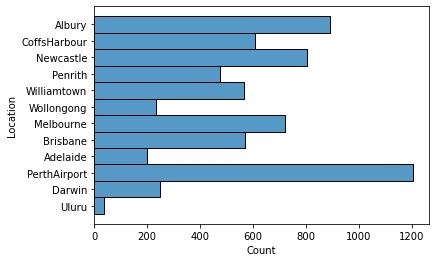

In [17]:
sns.histplot(y=df['Location'])

# 
As per the above information perthairport is highest rainfall and weather  information in the dataset

Yes    1535
No     5023
Name: RainTomorrow, dtype: int64


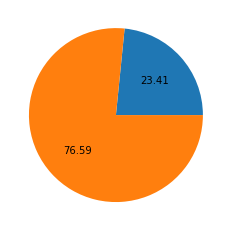

In [18]:
count_Type_of_glass=(df['RainTomorrow'].value_counts().sort_values())
print(count_Type_of_glass)

plt.pie(x=count_Type_of_glass,autopct='%.2f',pctdistance=0.6, labeldistance=2)
plt.show()

#  
The data is imbalance but we can solve this issue when we build a model

<AxesSubplot:xlabel='Date', ylabel='MinTemp'>

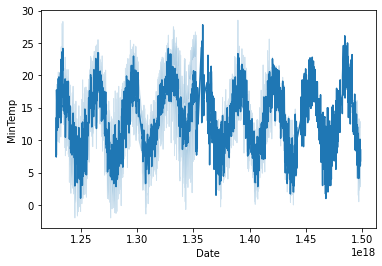

In [19]:
sns.lineplot(x ='Date',y='MinTemp',data=df)

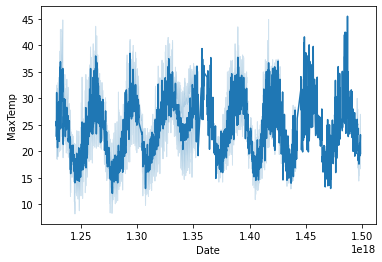

In [20]:
sns.lineplot(x ='Date',y='MaxTemp',data=df)
plt.show()

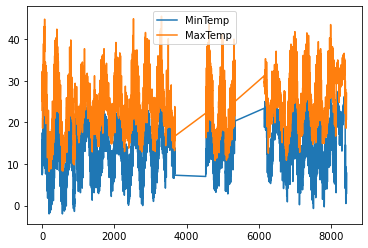

In [21]:
df[['MinTemp','MaxTemp',]].plot()
plt.show()

# 
Above the visiluation showing a min and max temprature in the dataset

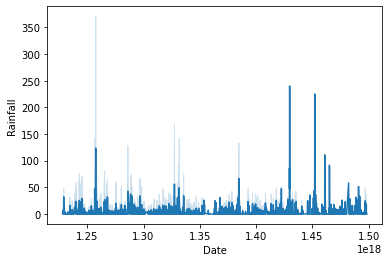

In [22]:
sns.lineplot(x ='Date',y='Rainfall',data=df)
plt.show()

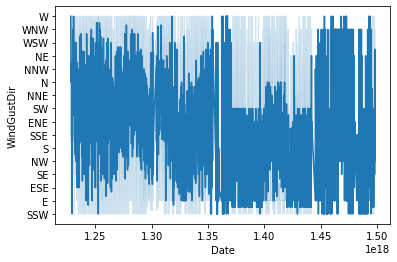

In [23]:
sns.lineplot(x ='Date',y='WindGustDir',data=df)
plt.show()

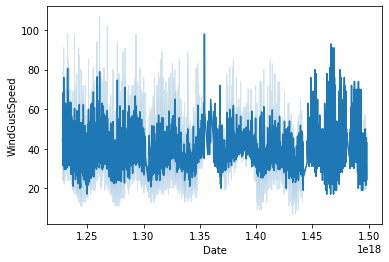

In [24]:
sns.lineplot(x ='Date',y='WindGustSpeed',data=df)
plt.show()

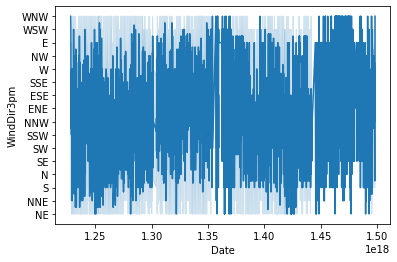

In [25]:
sns.lineplot(x ='Date',y='WindDir3pm',data=df)
plt.show()

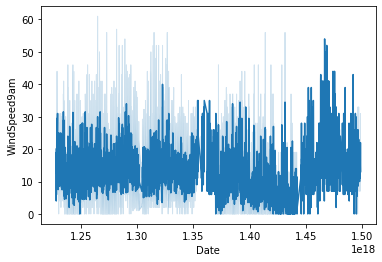

In [26]:
sns.lineplot(x ='Date',y='WindSpeed9am',data=df)
plt.show()

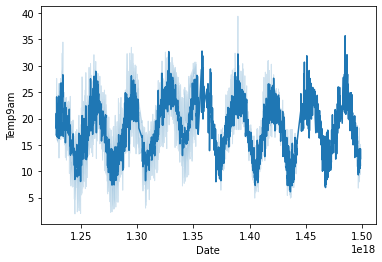

In [27]:
sns.lineplot(x ='Date',y='Temp9am',data=df)
plt.show()

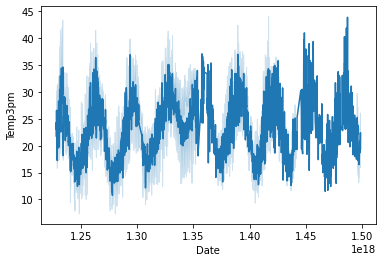

In [28]:
sns.lineplot(x ='Date',y='Temp3pm',data=df)
plt.show()

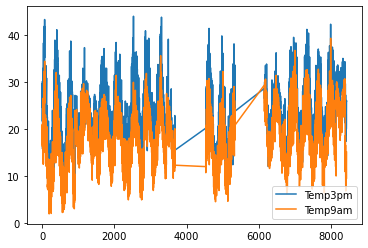

In [29]:
df[['Temp3pm','Temp9am']].plot()
plt.show()

# 
Above the visiluation we can see the temparature in 3pm and 9 am in the dataset

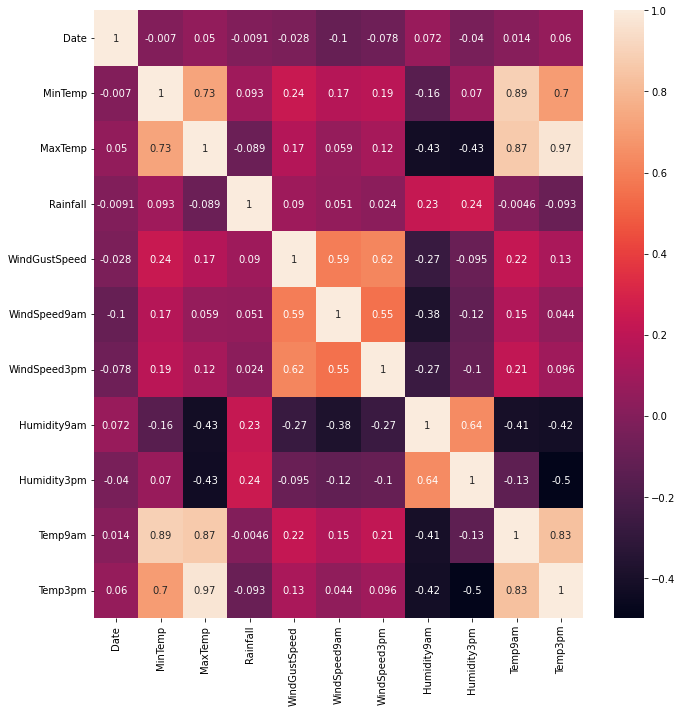

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

# 
As per the above visiluation we can see Min temp, maxtemp and temp9am ,temp3pm has a multicorelation with each others

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

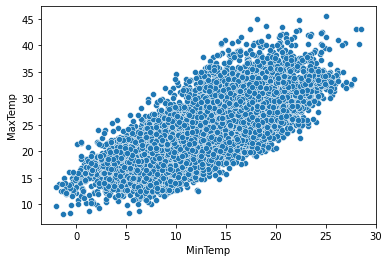

In [31]:
 sns.scatterplot(data=df,x='MinTemp',y='MaxTemp')

<AxesSubplot:xlabel='MinTemp', ylabel='Temp9am'>

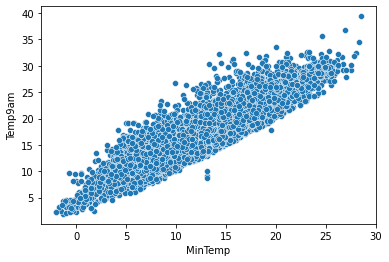

In [32]:
 sns.scatterplot(data=df,x='MinTemp',y='Temp9am')

<AxesSubplot:xlabel='MinTemp', ylabel='Temp3pm'>

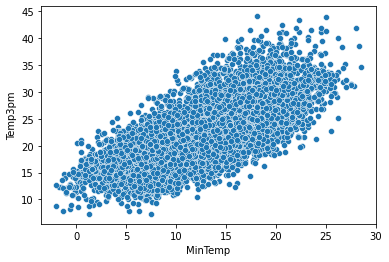

In [33]:
 sns.scatterplot(data=df,x='MinTemp',y='Temp3pm')

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp3pm'>

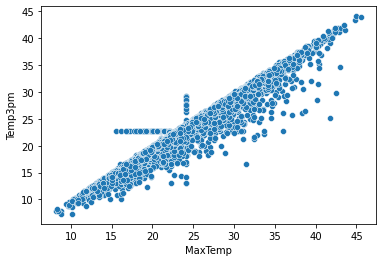

In [34]:
 sns.scatterplot(data=df,x='MaxTemp',y='Temp3pm')

#  
As the above information  MinTemp has  co-relation with MaxTemp, Temp9am and Temp3pm but we drop only Temp9am and Temp3pm
and keep it MaxTemp column and we check it later with vif score and decide to take this column or not

In [35]:
df.drop(columns=['Temp9am','Temp3pm'],axis=1,inplace=True)

In [36]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

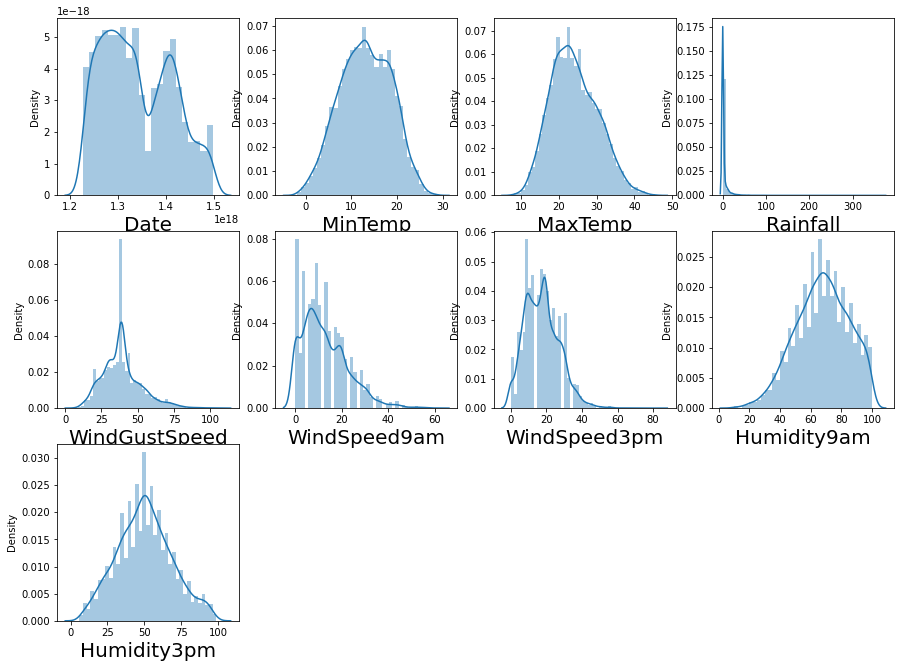

In [37]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

#  
Above the distrubution plot we can see mintep,maxtemp and humidity3pm is look like normally distrubuted 

rainfall, windgustspeed windspeed9am and windspeed3pm is right skewed 
and humidity9am is left skewes

#  outliers checking

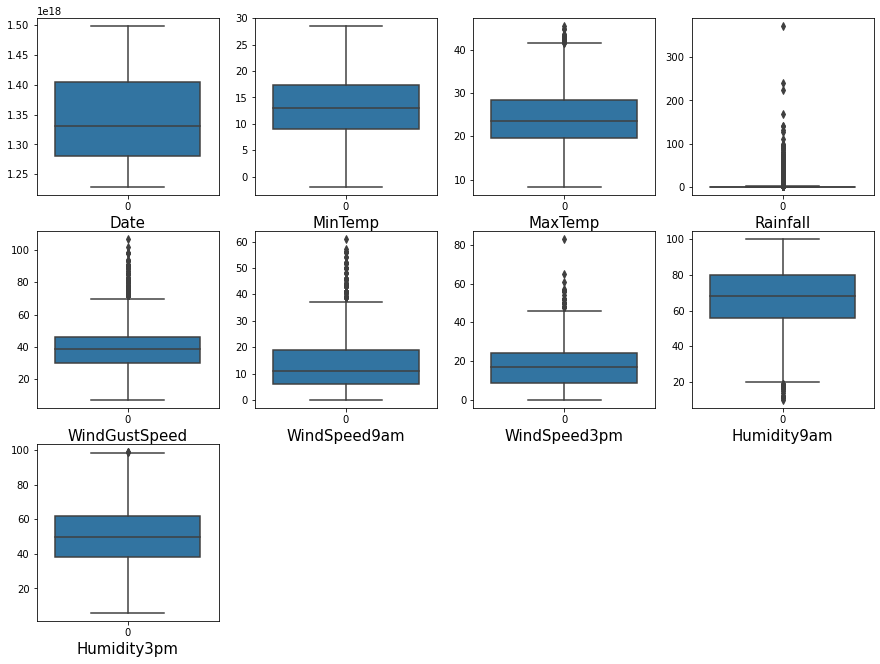

In [38]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  
As above the boxplot information we can see windgustspeed,windspeed9am,windspeed3pm,humidity9am 

has outliers found in the dataset we have to remove outliers

In [39]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i]=lm.fit_transform(df[i])

In [40]:
x=df.drop(columns=['Rainfall','RainTomorrow'])
y=df[['Rainfall','RainTomorrow']]

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(6558, 13)

In [42]:
df.shape

(6558, 15)

# threshold=3
print(np.where(z>3))

In [43]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(6558, 15)
(6407, 15)


In [44]:
y[(z<3).all(axis=1)]
print(y.shape)

(6558, 2)


# percentage of data loss:

In [45]:
loss_percent = (6558-6407)/6558*100
loss_percent

2.3025312595303444

#  Using zscore we loss 2 percent of dataloss

In [46]:
df=df[(z<3).all(axis=1)]

In [47]:
df.skew()

Date              0.322305
Location          0.004051
MinTemp          -0.074311
MaxTemp           0.294261
Rainfall         13.756535
WindGustDir       0.097356
WindGustSpeed     0.502249
WindDir9am        0.205779
WindDir3pm       -0.126278
WindSpeed9am      0.675262
WindSpeed3pm      0.351174
Humidity9am      -0.234042
Humidity3pm       0.158112
RainToday         1.237698
RainTomorrow      1.276794
dtype: float64

#  
we found rainfall  skewness we use cuberoot to reduce skewness

In [48]:
df.skew()

Date              0.322305
Location          0.004051
MinTemp          -0.074311
MaxTemp           0.294261
Rainfall         13.756535
WindGustDir       0.097356
WindGustSpeed     0.502249
WindDir9am        0.205779
WindDir3pm       -0.126278
WindSpeed9am      0.675262
WindSpeed3pm      0.351174
Humidity9am      -0.234042
Humidity3pm       0.158112
RainToday         1.237698
RainTomorrow      1.276794
dtype: float64

In [49]:
x=df.drop(columns=['Rainfall','RainTomorrow'])
y=df['RainTomorrow']
z=df['Rainfall']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday
0,-1.585654,-1.381783,0.066960,-0.189306,1.216892,0.476623,1.312511,1.371502,0.863255,0.760595,0.190293,-1.553260,-0.557219
1,-1.584455,-1.381783,-1.009874,0.174119,1.407785,0.476623,-0.225553,1.594313,-0.907226,0.540372,-1.393100,-1.390231,-0.557219
2,-1.583257,-1.381783,-0.022776,0.273235,1.598678,0.638340,1.312511,1.594313,0.752600,0.980818,-1.744965,-1.118515,-0.557219
3,-1.582058,-1.381783,-0.686824,0.653180,-0.501142,-1.140546,0.433617,-1.747850,-0.132641,-0.891078,-1.334455,-1.879319,-0.557219
4,-1.580860,-1.381783,0.802797,1.363511,1.216892,0.234048,-1.324171,-0.188174,-0.575261,0.320149,0.835379,-0.955486,-0.557219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,2.157566,1.198069,-1.709816,-0.371019,-1.264712,-0.574537,-1.104447,-1.747850,0.309980,-0.450632,-0.513437,-1.281544,-0.557219
6403,2.158764,1.198069,-1.835447,-0.106710,-1.264712,-0.574537,0.433617,-1.525039,0.088670,-0.670855,-0.982590,-1.444574,-0.557219
6404,2.159963,1.198069,-1.691869,0.207158,-0.119356,-1.302263,0.433617,-1.079417,0.088670,-0.891078,-0.689369,-1.607603,-0.557219
6405,2.161161,1.198069,-1.368819,0.471467,-0.692034,-0.089386,0.433617,1.371502,-0.353951,-0.891078,-0.865302,-1.444574,-0.557219


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,1.513125,Date
1,1.598586,Location
2,4.315707,MinTemp
3,5.137131,MaxTemp
4,1.521244,WindGustDir
5,2.025936,WindGustSpeed
6,1.297321,WindDir9am
7,1.330468,WindDir3pm
8,1.990707,WindSpeed9am
9,1.845741,WindSpeed3pm


#  
Above the given VIF scores, there doesn't seem to be a strong multicollinearity problem among the features
now we can build a model

# 
First we build rainfall prediction cause raintommorow data is imbalanced so first we balance the data and then we can build a classification promblem 

In [52]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [53]:
maxAccu = 0
maxRs = 0

for i in range(1, 5000):
    x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.405386507965698 at random_state 2626


In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [55]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.2975128423653909
R2_score on training data:  21.809750633863167
MEAN ABSOLUTE ERROR : 2.7895244165134767
MEAN SQUARED ERROR : 48.6887583839989
ROOT MEAN SQUARED ERROR : 6.977733040465141


In [56]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.4162315352804713
R2_score on training data:  63.22588735162877
MEAN ABSOLUTE ERROR : 2.1872224513903107
MEAN SQUARED ERROR : 40.46047165706481
ROOT MEAN SQUARED ERROR : 6.36085463259968


In [57]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.40098271793544815
R2_score on training data:  87.73087489910564
MEAN ABSOLUTE ERROR : 2.1336437857514303
MEAN SQUARED ERROR : 41.51735358762352
ROOT MEAN SQUARED ERROR : 6.443396122203222


In [58]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.2975128423653909
R2_score on training data:  100.0
MEAN ABSOLUTE ERROR : 2.7895244165134767
MEAN SQUARED ERROR : 48.6887583839989
ROOT MEAN SQUARED ERROR : 6.977733040465141


In [59]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.1616258994577845
R2_score on training data:  35.683708583861105
MEAN ABSOLUTE ERROR : 2.2434321372854913
MEAN SQUARED ERROR : 58.106961206448254
ROOT MEAN SQUARED ERROR : 7.622792218501581


In [60]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.278804168159009
R2_score on training data:  19.798672680448448
MEAN ABSOLUTE ERROR : 2.3503204583074977
MEAN SQUARED ERROR : 49.9854399079525
ROOT MEAN SQUARED ERROR : 7.070038182920407


In [61]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.29753076324140737
R2_score on training data:  35.683708583861105
MEAN ABSOLUTE ERROR : 2.789318998797414
MEAN SQUARED ERROR : 48.68751630406489
ROOT MEAN SQUARED ERROR : 6.977644036783826


#  CROSS VALIDATION SCORE

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.36874504 0.17640765 0.25298412 0.33372736 0.33909079]
0.294190992282153
Difference between Accuracy score  and cross validation score is -  0.003321850083237876


In [64]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[0.38147999 0.26391925 0.05922486 0.36037598 0.38219802]
0.28943962043427324
Difference between Accuracy score  and cross validation score is -  0.12679191484619806


In [65]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.33876733 0.22895013 0.08241558 0.33534319 0.37682397]
0.27246003800280205
Difference between Accuracy score  and cross validation score is -  0.1285226799326461


In [66]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[-0.38519033 -0.69911642 -0.87090266 -0.33073396 -0.45878334]
-0.5489453423127655
Difference between Accuracy score  and cross validation score is -  0.1716644210963325


In [67]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[0.28393709 0.13761512 0.13299633 0.25780531 0.24854358]
0.2121794859644235
Difference between Accuracy score  and cross validation score is -  -0.05055358650663899


In [68]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[-1.29920745e-03 -2.89060373e-03 -3.44433818e-03 -8.26025661e-05
 -2.44386750e-02]
-0.00643108538272732
Difference between Accuracy score  and cross validation score is -  0.2852352535417363


In [69]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.36873866 0.17654236 0.25296238 0.33371826 0.33907513]
0.2942073589264507
Difference between Accuracy score  and cross validation score is -  0.003323404314956646


In [71]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [1.0, 0.05, 0.4, 2],
          'random_state': [1, 4, 10, 20]}

gdsv = GridSearchCV(GradientBoostingRegressor(), params, cv=5)
gdsv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'random_state': [1, 4, 10, 20]})

In [72]:
gdsv.best_params_

{'alpha': 0.05, 'random_state': 20}

#  Rainfall prediction final model

In [73]:
Final_model = GradientBoostingRegressor(alpha=0.05, random_state=20)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

41.30489391966673


#  Raintommorow prediction model build

In [95]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.9083530605343253 at random_state 228


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)

In [98]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [99]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.7876225904633074


[[1140  305]
 [ 323 1189]]


In [100]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.9026039905309435


[[1290  155]
 [ 133 1379]]


In [101]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.9212039228948259


[[1316  129]
 [ 104 1408]]


In [102]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.8342915116672303


[[1225  220]
 [ 270 1242]]


In [103]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.8586405140344944


[[1243  202]
 [ 216 1296]]


In [104]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.8112952316537031


[[1183  262]
 [ 296 1216]]


In [105]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.8772404463983767


[[1302  143]
 [ 220 1292]]


#  Cross Validation Score

In [106]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.68594622 0.65144597 0.65449011 0.78843227 0.83147208]
0.7223573284709506
Difference between Accuracy score  and cross validation score is -  0.06526526199235683


In [107]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.54236428 0.57179097 0.63216641 0.73566717 0.82588832]
0.6615754326052636
Difference between Accuracy score  and cross validation score is -  0.2410285579256799


In [108]:
print('RandomForestClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

RandomForestClassifier 


[0.51953323 0.57483511 0.62810756 0.73363775 0.83654822]
0.6585323742489447
Difference between Accuracy score  and cross validation score is -  0.2440716162819988


In [109]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.65398275 0.56570269 0.60882801 0.688483   0.78375635]
0.6601505587361925
Difference between Accuracy score  and cross validation score is -  0.1741409529310377


In [110]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.60527651 0.5129376  0.58346017 0.66615931 0.7177665 ]
0.6171200168947196
Difference between Accuracy score  and cross validation score is -  0.24152049713977475


In [111]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.536276   0.52968037 0.56468798 0.62303399 0.74416244]
0.599568154483668
Difference between Accuracy score  and cross validation score is -  0.21172707717003514


In [112]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.53779807 0.56722476 0.60679858 0.72450533 0.74670051]
0.6366054490621627
Difference between Accuracy score  and cross validation score is -  0.24063499733621407


#  RandomForestClassifier is giving 87 percent accuracy and 7 percent differnce in cross validation score

# 

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gdsv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [114]:
gdsv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

#  RainTomorrow prediction model

In [115]:
Final_model= RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=5,n_estimators=50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)
print(confusion_matrix(y_test, pred))

90.05749070003381
[[1294  151]
 [ 143 1369]]


# 
Using hyperpyrameter tunning we loose 1 percent of quality